In this notebook, I will present one type of classifiers:
- $\textbf{K-Nearest Neighbor(KNN) Classification}$

The data used in this notebook are the magnitudes in 5 different filters (ugriz) of 3 different objects:
stars, quasars, and white dwarfs.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 11
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 11
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=True #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=25 #
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks


plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']=22
plt.rcParams['figure.titlesize']=22

plt.rcParams['text.latex.preamble']=[r'\boldmath']

## 1) Import and look at the data

The labels are known and correspond to 1=star, 2=quasar, 3=white dwarf

In [3]:
df = pd.read_csv("Data/SDSS_all_classes_21.csv")
#Let's select only 20 000 objects 
df = df.sample (20000)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 43387 to 57292
Data columns (total 7 columns):
class      20000 non-null int64
u_mag      20000 non-null float64
g_mag      20000 non-null float64
r_mag      20000 non-null float64
i_mag      20000 non-null float64
z_mag      20000 non-null float64
max_mag    20000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB
None


This data set from the Sky Digital Sloan Survey is composed by 83102 objects for which we have the class, the magnitudes in 5 filters (u,g,r,i,z) and the maximum magnitude. Our we select only 20 000 objects, for CPU reason.
The labels are known and correspond to 1=star, 2=quasar, 3=white dwarf. 

In [4]:
#Using pandas you can use describe to have a description of the data
df.describe()

,class,u_mag,g_mag,r_mag,i_mag,z_mag,max_mag
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.049650,19.349360,19.019566,18.869087,18.759545,18.700812,19.401396
std,0.408526,1.154494,1.196255,1.241020,1.259250,1.283725,1.139214
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.906000,18.620000,18.499000,18.393000,18.303000,18.953811
50%,2.000000,19.424000,19.154000,19.020500,18.917000,18.842000,19.460000
75%,2.000000,19.974000,19.642000,19.497000,19.385000,19.354000,20.032000
max,3.000000,20.998000,20.981000,20.909000,20.999000,21.000000,21.000000


In [5]:
u,g,r,i,z=df['u_mag'].values,df['g_mag'].values,df['r_mag'].values,df['i_mag'].values,df['z_mag'].values
target=df['class'].values
#Clean data by removing magnitude =0 
m_u,m_g,m_r,m_i,m_z=u[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],g[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],r[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],i[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],z[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)]
target=target[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)] 

colours = np.array([m_u - m_g, m_g - m_r, m_r - m_i, m_i - m_z]).transpose()
names_colours = np.array(['(u-g)', '(g-r)', '(r-i)', '(i-z)'])
name_target=np.array([r'\textbf{Stars}', r'\textbf{Quasars}', r'\textbf{White Dwarfs}'])

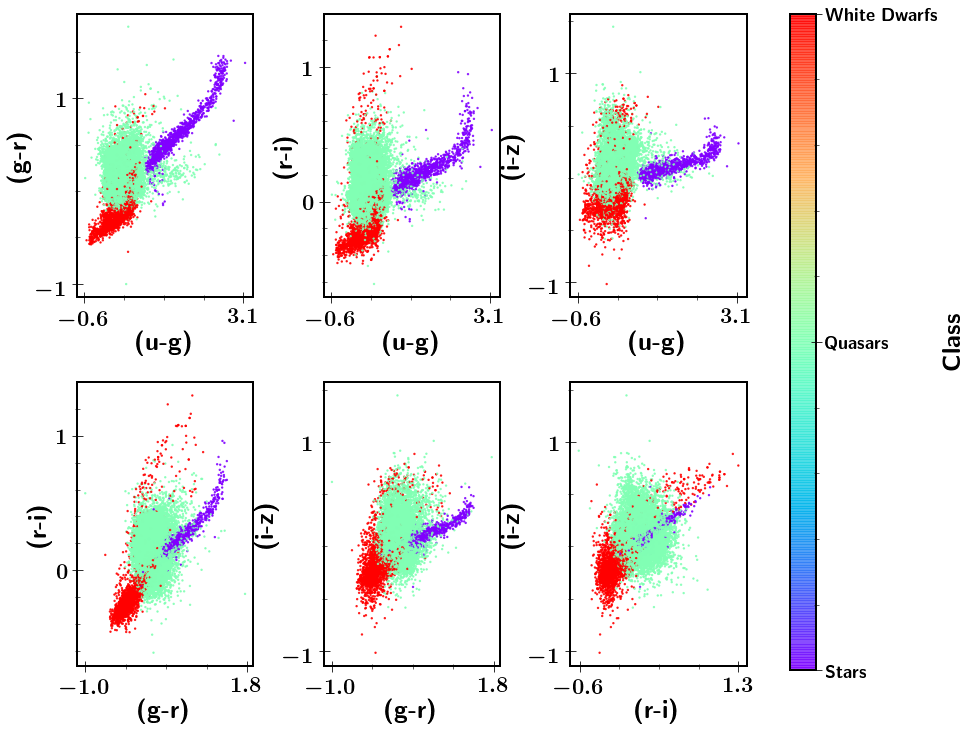

In [6]:
#Let's plot different colour-colour plots to see the data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    c=target
    s=2
    if i<3:
        x_plot=colours[:,0]
        y_plot=colours[:,i+1]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[0])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[i+1])

    elif (i==3) or (i==4):
        x_plot=colours[:,1]
        y_plot=colours[:,i-1]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[1])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[i-1])

    else:
        x_plot=colours[:,2]
        y_plot=colours[:,3]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[2])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[3])


#Color bar
cax = plt.axes([0.95, 0.120, 0.03, 0.76])
clb = plt.colorbar(sc,cax=cax,ticks=[1,2,3])
clb.ax.set_ylabel(r'\textbf{Class}')
clb.ax.set_yticklabels(name_target)
clb.ax.tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.3)   
fig.subplots_adjust(wspace=0.4)  

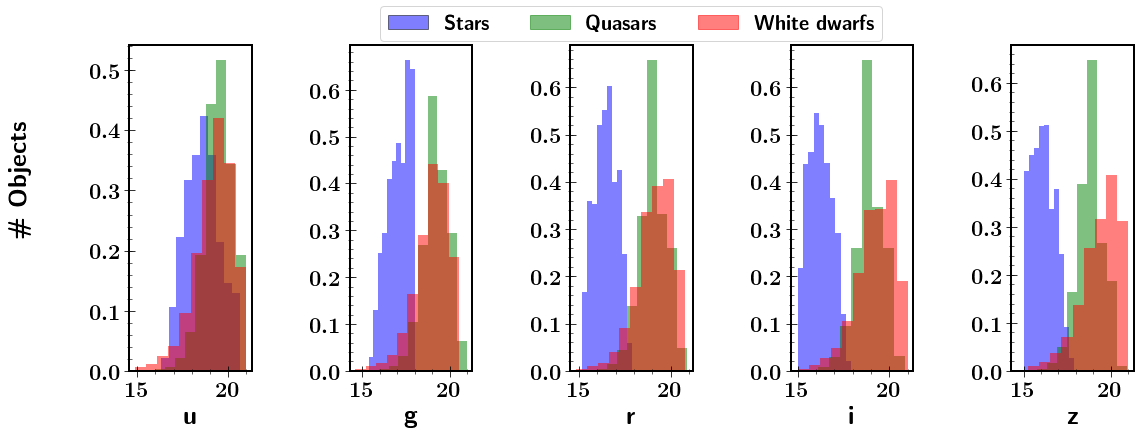

In [7]:
#Let's plot different the distribution of magnitudes
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))
mag_tot=m_u,m_g,m_r,m_i,m_z
filters=['u','g','r','i','z']
for i, ax in enumerate(axes.flatten()):
    ax.hist(mag_tot[i][target==1],alpha=0.5,color='blue',density=True)
    ax.hist(mag_tot[i][target==2],alpha=0.5,color='green',density=True)
    ax.hist(mag_tot[i][target==3],alpha=0.5,color='red',density=True)
    ax.set_xlabel(r'\textbf{%s}'%filters[i])
fig.subplots_adjust(wspace=0.8)
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,right=False,left=False)
plt.xticks([])
plt.yticks([])
fig.text(0.04, 0.57, r'\textbf{\# Objects}', va='center', ha='center', rotation='vertical',fontsize=25)

legend_elements = [Rectangle((0,0),1,1,color='b',alpha=0.5,ec='k', label=r'\textbf{Stars}'),Rectangle((0,0),1,1,color='g',alpha=0.5, label=r'\textbf{Quasars}'),Rectangle((0,0),1,1, color='r',alpha=0.5, label=r'\textbf{White dwarfs}')]
plt.legend(handles=legend_elements,loc=(0.25, 1.01), frameon=True,fancybox=True,markerscale=5,prop={'size':20},ncol=5)

## 2) Nearest Neighbor classifier


The k-nearest-neighbors algorithm is a supervised classification algorithm.
To label a new point (see figure):
- Calculate distances
- Then select the k closest neighbors. Here, we select only 3 neighbors. Look at the label of these 3 points.
- Finally,vote for label: so whichever label the most of the neighbors have is the label for the new point

In this example, the label of the point, for which label needs to predict, will be class B

(image from https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
![title](Data/KNN.png)


In [8]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(colours, target, test_size=0.2, random_state=1, stratify=None)
#‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
#Setting ‘stratify’ to None makes our training split represent the proportion of each value in the y variable.

#import the classifier
from sklearn.neighbors import KNeighborsClassifier



## 2.1) How many neighbors should we use?
First we need to define the number of neighbors. For this we will use GridSearchCV.  
GridSearchCV works by training our model multiple times on a range of parameters that we specify.   
That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results

In [9]:
from sklearn.model_selection import GridSearchCV
# Create KNN classifier
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors 1 to 10
param_grid = {'n_neighbors': np.arange(1, 10)}
# Fit the classifier to the data
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
#check top performing n_neighbors value
N_n=knn_gscv.best_params_['n_neighbors']
print('N neighbors: %s' % N_n)


N neighbors: 5


## 2.2) Create and test model
Now we can apply the k-Nearest-Neighbors classifier on our data

In [10]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = N_n)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#Predict the test sample
y_pred_knn=knn.predict(X_test)

In [11]:
# Let's look the first 10 predictions and real label:
print('Real label: %s' % y_test[0:10])
print('prediction: %s' % y_pred_knn[0:10])


Real label: [2 2 2 2 3 3 1 2 3 2]
prediction: [2 2 2 2 3 2 1 2 3 2]


In [12]:
#Let's look at the accuracy, score
from sklearn import metrics
print(f'Accuracy for KNeighbors Classifier = {metrics.accuracy_score(y_test, y_pred_knn):.4f}')
print(f'Precision for KNeighbors Classifier = %s'%np.around(metrics.precision_score(y_test, y_pred_knn, average=None),3))
print(f'Recall for KNeighbors Classifier = %s'%np.around(metrics.recall_score(y_test, y_pred_knn, average=None),3))
print(f'F1-score for KNeighbors Classifier = %s'%np.around(metrics.f1_score(y_test, y_pred_knn, average=None),3))


Accuracy for KNeighbors Classifier = 0.9862
Precision for KNeighbors Classifier = [ 0.974  0.989  0.97 ]
Recall for KNeighbors Classifier = [ 0.996  0.995  0.915]
F1-score for KNeighbors Classifier = [ 0.985  0.992  0.942]


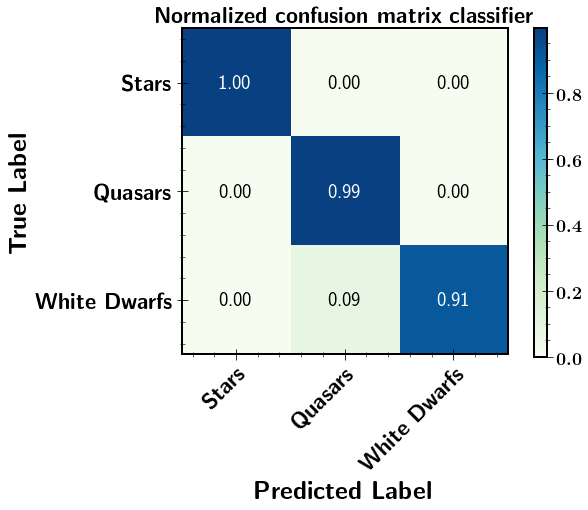

In [13]:
def conf_matrix(true, predict, classes, normalized=True, cl_names=None):
    '''
    function to plot confusion matrix
    '''
    cm = metrics.confusion_matrix(true, predict, labels=classes)
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title=r'\textbf{Normalized confusion matrix classifier}'
    else:
        title=r'\textbf{Confusion matrix classifier}'

    fig, ax = plt.subplots(figsize=(6,6), facecolor='w', edgecolor='k')
    im = ax.imshow(cm, interpolation='nearest', cmap="GnBu")
    
    #Color bar
    cax = plt.axes([0.95, 0.120, 0.03, 0.76])
    clb = fig.colorbar(im,cax=cax)
    clb.ax.tick_params(labelsize=18)
    
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=cl_names, 
           yticklabels=cl_names,xlabel=r'\textbf{Predicted Label}',ylabel=r'\textbf{True Label}',title=title)
        
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalized else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",size=20) 
    return ax

    
conf_matrix(y_test, y_pred_knn, [1,2,3], cl_names=name_target)

In [14]:
#Classification Probability (10 first)
prediction_prob=knn.predict_proba(X_test)
prob_df = pd.DataFrame(prediction_prob, columns=['Stars','Quasars','White dwarfs'])
prob_df.head(10)


,Stars,Quasars,White dwarfs
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,0.8,0.2
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0
